In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, ward
from scipy.spatial.distance import pdist
import pickle
import neuro_morpho_toolbox as nmt
import numpy as np
import shutil

D:\ProgramData\Anaconda3\envs\neuronbeta\lib\site-packages\neuro_morpho_toolbox-0.1-py3.7.egg\neuro_morpho_toolbox\
Loading CCF Atlas data...
Loading time: 0.91
Loading CCF brain structure data...
Loading time: 0.04
Loading selected CCF Atlas and Contour data...
Loading time: 9.07


In [2]:
def get_node_region(point):
    p = point[['x', 'y', 'z']].copy()
    p['x'] = p['x'] / nmt.annotation.space['x']
    p['y'] = p['y'] / nmt.annotation.space['y']
    p['z'] = p['z'] / nmt.annotation.space['z']
    p = p.round(0).astype(int)
    if ((p.x.iloc[0] >= 0) & (p.x.iloc[0] < nmt.annotation.size['x']) &
            (p.y.iloc[0] >= 0) & (p.y.iloc[0] < nmt.annotation.size['y']) &
            (p.z.iloc[0] >= 0) & (p.z.iloc[0] < nmt.annotation.size['z'])
    ):
        region_id = nmt.annotation.array[p.x.iloc[0],
                                         p.y.iloc[0],
                                         p.z.iloc[0]]
        if region_id in list(nmt.bs.dict_to_selected.keys()):
            region_id = nmt.bs.dict_to_selected[region_id]
            region = nmt.bs.id_to_name(region_id)
            return region

    return 'unknow'

In [3]:
label_df = pd.read_csv('../final_data/3002_cell_soma.csv', sep=',', index_col=0)
label_df['region'] = label_df.apply(lambda r: get_node_region(pd.DataFrame({'x': [r.x], 'y': [r.y], 'z': [r.z]})), axis=1)
label_df.index = [i.split('.')[0] for i in label_df.index]
label_df

,type,x,y,z,r,parent,region
17109_1701_x8048_y22277,1,2820.175,3990.050,7795.550,1.0,-1,AId
17109_1801_x6698_y12550,1,3003.125,3453.775,4191.800,1.0,-1,ORBl
17109_1901_x9602_y10508,1,3183.950,4764.250,3375.825,1.0,-1,AIv
17109_2201_x8046_y23301,1,3479.625,3790.725,8126.500,1.0,-1,MOp
17109_2301_x8535_y23051,1,3562.350,4013.725,8007.975,1.0,-1,AId
...,...,...,...,...,...,...,...
pre_18866_00186,1,9014.500,3195.725,2810.000,1.0,-1,DG
pre_18866_00299,1,8793.700,4237.000,2382.125,1.0,-1,DG
pre_18866_01458,1,8035.300,2626.400,7929.675,1.0,-1,DG
pre_18868_00443,1,3882.700,2516.325,7802.225,1.0,-1,MOp


In [4]:
with open(r'D:\2022\whole_brain_con\final_data\connectivity_results\Allen_Janelia_re10um_single_cell_level_summaryz_unfilpped.pickle', 'rb') as f:
    data_dict = pickle.load(f)
    
print('not reach denRadius: ', -1)
print('self-con: ', -2)
data_dict.keys()

not reach denRadius:  -1
self-con:  -2


dict_keys(['mean', 'mean.adj', 'numAxonNods'])

In [5]:
cur_type = 'mean.adj'
df = data_dict[cur_type].copy()
df.index = [i.split('.')[0] for i in df.index]
df

,18454_00111,18455_00121,AA0264,18453_3186_x12745_y7108,18457_00141,pre_18464_00077,18453_7132_x31679_y7308,18458_00450,18465_00349,AA0663,...,AA0755,AA0329,AA0517,191807_2469_x5431_y10056,AA0783,18454_00096,17545_00030,191812_3140_x5204_y12992,AA0652,18454_01114
17109_1701_x8048_y22277,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,...,-1.0,-1.0,-1.0,188.776,-1.000,-1.0,-1.0,72.08,-1.000,-1.0
17109_1801_x6698_y12550,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,12.591,...,-1.0,-1.0,-1.0,52.942,32.046,-1.0,-1.0,-1.00,79.823,-1.0
17109_1901_x9602_y10508,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,...,-1.0,-1.0,-1.0,106.316,-1.000,-1.0,-1.0,-1.00,-1.000,-1.0
17109_2201_x8046_y23301,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,...,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.00,-1.000,-1.0
17109_2301_x8535_y23051,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,...,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.00,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pre_18866_00186,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,...,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.00,-1.000,-1.0
pre_18866_00299,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,...,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.00,-1.000,-1.0
pre_18866_01458,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,...,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.00,-1.000,-1.0
pre_18868_00443,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,...,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.00,-1.000,-1.0


In [6]:
# src=r'D:\datasets\test.csv'
# df=pd.read_csv(src, index_col=0)
# df.index = [i.split('.')[0] for i in df.index]
# df.columns = [i.split('.')[0] for i in df.columns]
sele_list = list(set(label_df.index).intersection(set(df.columns)))
label_df = label_df.loc[sele_list, :]
df = df.loc[sele_list, sele_list]
df

,18458_00242,AA0856,18869_6454_x17703_y2478,AA0920,17545_00050,pre_18465_00102,18457_00065,17545_00065,18453_2991_x13607_y7348,18455_00127,...,18868_7311_x22238_y17329,AA0165,AA0525,18462_00016,18453_6576_x22528_y4353,pre_17543_01053,AA0762,AA0513,18454_00059,18454_00051
18458_00242,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
AA0856,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
18869_6454_x17703_y2478,-1.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
AA0920,-1.0,-1.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
17545_00050,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pre_17543_01053,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0
AA0762,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,-1.0,-1.0
AA0513,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,-1.0
18454_00059,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0


In [7]:
used_index = np.argwhere((df.values!=-1)&(df.values!=-2))
values_list = df.values[used_index[:,0], used_index[:,1]]
# ave_self_con = np.mean(values_list)
# std_self_con = np.std(values_list)
# out_reach = ave_self_con+*std_self_con
# print(ave_self_con, std_self_con, out_reach)
print(values_list)

[376.777 210.312 101.359 ...  88.205 175.51   70.538]


<AxesSubplot:ylabel='Density'>

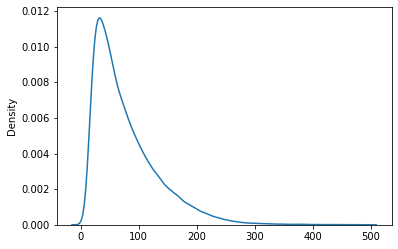

In [8]:
sns.kdeplot(values_list)

In [9]:
all_values = values_list.reshape(-1,1).copy()
all_scaled = 1-MinMaxScaler().fit_transform(all_values)
all_scaled = all_scaled.reshape(values_list.shape)

<AxesSubplot:ylabel='Density'>

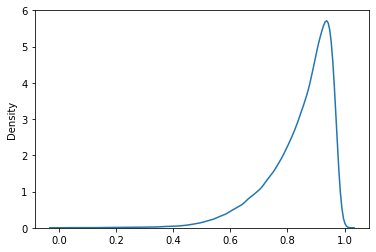

In [10]:
sns.kdeplot(all_scaled)

In [11]:
v = df.values.copy()
v[v==-1] = 0
v[v==-2] = 0
print(v.shape)


(2989, 2989)


In [12]:
used_index

array([[   0,   66],
       [   0, 1897],
       [   0, 1959],
       ...,
       [2988, 2750],
       [2988, 2823],
       [2988, 2958]], dtype=int64)

In [13]:
v[used_index[:,0], used_index[:,1]] = all_scaled
v

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
v[used_index[:,0], used_index[:,1]]

array([0.2366017 , 0.57521292, 0.79683734, ..., 0.82359426, 0.64600467,
       0.85953121])

In [15]:
df_scale = pd.DataFrame(v, index=df.index, columns=df.columns)
df_scale

,18458_00242,AA0856,18869_6454_x17703_y2478,AA0920,17545_00050,pre_18465_00102,18457_00065,17545_00065,18453_2991_x13607_y7348,18455_00127,...,18868_7311_x22238_y17329,AA0165,AA0525,18462_00016,18453_6576_x22528_y4353,pre_17543_01053,AA0762,AA0513,18454_00059,18454_00051
18458_00242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AA0856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18869_6454_x17703_y2478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AA0920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17545_00050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pre_17543_01053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AA0762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AA0513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18454_00059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
from tqdm import tqdm
neuron_pairs = []
for i in tqdm(used_index):
    tmp = df.iloc[[i[0]], [i[1]]]
    neuron_pairs.append([tmp.index[0], tmp.columns[0]])

100%|████████████████████████████████████████████████████████████████████████| 105960/105960 [00:28<00:00, 3749.87it/s]


In [17]:
len(neuron_pairs)

105960

In [183]:
src=r'D:\datasets\test'
if os.path.exists(src):
    shutil.rmtree(src)
    os.mkdir(src)
else:
    os.mkdir(src)

k = 1
cur_pairs = neuron_pairs[k]
print(cur_pairs)
for k,i in enumerate(cur_pairs):
    if i.find('stamp')>0:
        swc_path = r'D:\datasets\Allen_Janelia\Allen_Jan_re10um'+'\\'+i+'.ano.swc'
    else:
        swc_path = r'D:\datasets\Allen_Janelia\Allen_Jan_re10um'+'\\'+i+'.swc'
    df = pd.read_csv(swc_path, skiprows=3, header=None, sep=' ', names = ['##n','type','x','y','z','r','pid'],
                    usecols=[0,1,2,3,4,5,6])
    if k == 0:
        df = df[df.type.isin([1,2])]
    else:
        df = df[df.type.isin([1,3,4])]
    df.to_csv(src+'\\'+i+'.swc', sep=' ',index=None)

['18458_00242', '18869_4953_x22613_y6076']


In [178]:
df

,# id,type,x,y,z,r,pid
0,1,1,7562.76,5340.84,5063.43,1.000000,-1
1,2,3,7566.94,5351.18,5048.96,1.000000,3
2,3,1,7564.65,5345.52,5056.88,1.000000,1
3,4,3,7458.29,5147.65,5137.41,1.000000,5
4,5,3,7460.44,5148.92,5127.72,1.000000,6
...,...,...,...,...,...,...,...
290,291,3,7583.20,5328.58,5080.95,1.000000,292
291,292,3,7577.83,5334.36,5075.50,1.000000,293
292,293,3,7571.08,5338.25,5069.45,1.000000,294
293,294,1,7563.22,5340.70,5063.77,1.000000,1


In [20]:
# i = '18463_00014_SYY_WYP_SYY_WYP_stamp_2021_01_27_14_19'

In [21]:
# i.find('stamp')

In [22]:
regioncounts = label_df['region'].value_counts()
label_df = label_df[label_df.region.isin(regioncounts[regioncounts>30].index)]
print(len(label_df['region'].value_counts()))
label_df

21


,type,x,y,z,r,parent,region
18458_00242,1,7298.525000,3256.300000,3038.200000,1.0,-1,LGd
AA0856,1,4676.687500,2187.501953,6532.257813,1.0,-1,ACAd
AA0920,1,7255.046468,3586.571327,3654.821529,1.0,-1,VPM
17545_00050,1,4999.450000,4217.175000,8497.025000,1.0,-1,CP
pre_18465_00102,1,7691.525000,2224.350000,7363.675000,1.0,-1,DG
...,...,...,...,...,...,...,...
18453_6576_x22528_y4353,1,8642.525000,6976.700000,6884.825000,1.0,-1,unknow
pre_17543_01053,1,1326.500000,5700.700000,3275.475000,1.0,-1,unknow
AA0513,1,10056.298821,6093.223763,7267.514648,1.0,-1,unknow
18454_00059,1,7632.650000,3140.250000,7904.000000,1.0,-1,LGd


### 对行排序

In [23]:
# row_df = df_scale.T.copy()
# x=row_df.values
# print('raw x shape: ',x.shape)
# Z = linkage(x, 'centroid')
# fig = plt.figure(figsize=(25, 10))
# dn = dendrogram(Z)
# new_index = leaves_list(Z)
# row_df = row_df.iloc[new_index,:]
# print('row_df shape: ', row_df.shape)
# df_scale = df_scale[row_df.T.columns]
# print(df_scale.shape)

### 对列排序

In [24]:
# col_df = df_scale.copy()
# x=col_df.values
# print(x.shape)
# Z = linkage(x, 'centroid')
# fig = plt.figure(figsize=(25, 10))
# dn = dendrogram(Z)
# new_index = leaves_list(Z)
# col_df = col_df.iloc[new_index,:]
# df_scale = df_scale.loc[col_df.index, :]
# print(df_scale.shape)

In [25]:
majorRegion2color = {'CTX': 'r', 'CNU': 'b', 'TH': 'g', 'HY': 'y', 'MB': 'c', 'HB': 'm'}
detailRegion2rough = {}
roughRegion2detail = {'CNU':[], 'CTX':[], 'TH':{}, 'MB':[], 'HY':[], 'HB':[]}
for i in roughRegion2detail.keys():
    roughRegion2detail[i] = [nmt.bs.id_to_name(j) for j in nmt.bs.get_all_child_id(i)]

for k,v in roughRegion2detail.items():
    for vi in v:
        detailRegion2rough[vi] = k
label_df['majorRegion'] = label_df.apply(lambda r: detailRegion2rough[r.region] if r.region \
                                                   in detailRegion2rough.keys() else 'unknown', axis=1)
label_df = label_df.loc[~label_df.majorRegion.isin(['unknown']),:]
# label_df['c'] = label_df['majorRegion'].map(majorRegion2color)
label_df

,type,x,y,z,r,parent,region,majorRegion
18458_00242,1,7298.525000,3256.300000,3038.200000,1.0,-1,LGd,TH
AA0856,1,4676.687500,2187.501953,6532.257813,1.0,-1,ACAd,CTX
AA0920,1,7255.046468,3586.571327,3654.821529,1.0,-1,VPM,TH
17545_00050,1,4999.450000,4217.175000,8497.025000,1.0,-1,CP,CNU
pre_18465_00102,1,7691.525000,2224.350000,7363.675000,1.0,-1,DG,CTX
...,...,...,...,...,...,...,...,...
AA0165,1,8866.876952,3187.068997,8284.228498,1.0,-1,DG,CTX
AA0525,1,9212.237206,3185.095116,8432.918293,1.0,-1,PRE,CTX
18462_00016,1,6978.125000,4132.550000,7739.075000,1.0,-1,VPM,TH
18454_00059,1,7632.650000,3140.250000,7904.000000,1.0,-1,LGd,TH


In [26]:
sele_regions = [nmt.bs.id_to_name(i) for i in nmt.bs.selected_regions]
order_list = []
for i in sele_regions:
    tmp_index = label_df[label_df.region==i].index
    if len(order_list) == 0:
        order_list = list(tmp_index)
    else:
        order_list = order_list+list(tmp_index)
# order_rows
df_scale = df_scale.loc[order_list, order_list]

label_df = label_df.loc[order_list]
label_df

,type,x,y,z,r,parent,region,majorRegion
191807_4114_x3589_y10280,1,4360.150000,1911.050000,3895.850000,1.0,-1,MOp,CTX
AA0926,1,4745.631747,1758.744738,7123.496451,1.0,-1,MOp,CTX
18457_00034,1,3658.625000,3523.600000,3417.550000,1.0,-1,MOp,CTX
182725_4080_x6576_y11407,1,4765.225000,1482.675000,4404.000000,1.0,-1,MOp,CTX
18868_3419_x27168_y8481,1,4287.025000,2501.625000,2933.350000,1.0,-1,MOp,CTX
...,...,...,...,...,...,...,...,...
18462_00062,1,7424.975000,4742.100000,3682.500000,1.0,-1,ZI,HY
AA0177,1,6517.310706,5341.192395,4426.057327,1.0,-1,ZI,HY
17545_00142,1,7259.125000,4886.150000,3874.275000,1.0,-1,ZI,HY
AA0330,1,7116.918945,5137.761718,4288.570312,1.0,-1,ZI,HY


In [60]:
label_df.majorRegion.unique()

array(['CTX', 'CNU', 'TH', 'HY'], dtype=object)

In [147]:
# sele_index = label_df[label_df.majorRegion=='CTX'].index
sele_index = label_df.index

vis_data = df_scale.loc[sele_index]
vis_label = label_df.loc[sele_index]
vis_label

,type,x,y,z,r,parent,region,majorRegion,c
191807_4114_x3589_y10280,1,4360.150000,1911.050000,3895.850000,1.0,-1,MOp,CTX,#1f77b4
AA0926,1,4745.631747,1758.744738,7123.496451,1.0,-1,MOp,CTX,#1f77b4
18457_00034,1,3658.625000,3523.600000,3417.550000,1.0,-1,MOp,CTX,#1f77b4
182725_4080_x6576_y11407,1,4765.225000,1482.675000,4404.000000,1.0,-1,MOp,CTX,#1f77b4
18868_3419_x27168_y8481,1,4287.025000,2501.625000,2933.350000,1.0,-1,MOp,CTX,#1f77b4
...,...,...,...,...,...,...,...,...,...
18462_00062,1,7424.975000,4742.100000,3682.500000,1.0,-1,ZI,HY,#17becf
AA0177,1,6517.310706,5341.192395,4426.057327,1.0,-1,ZI,HY,#17becf
17545_00142,1,7259.125000,4886.150000,3874.275000,1.0,-1,ZI,HY,#17becf
AA0330,1,7116.918945,5137.761718,4288.570312,1.0,-1,ZI,HY,#17becf


In [148]:
vis_regioncounts = vis_label.region.value_counts()
for i in vis_regioncounts[vis_regioncounts>10].index:
    print(i)

MOs
VPM
CP
MOp
VPL
SUB
DG
SSs
SSp-m
PRE
LGd
SSp-bfd
VAL
SSp-ul
RT
AId
ACAd
MG
ZI


In [149]:
color_list = (sns.palettes.color_palette('tab20').as_hex() + sns.palettes.color_palette('Set2').as_hex())
print(len(color_list))

28


In [150]:
28%28

0

In [151]:
r2c = {}
for k,i in  enumerate(label_df['region'].unique()):
    k = k%28
    r2c[i] = color_list[k]

In [152]:
vis_label = vis_label[vis_label.region.isin(vis_regioncounts[vis_regioncounts>10].index)]
vis_label['c'] = vis_label['region'].map(r2c)
vis_data = vis_data.loc[vis_label.index]

vis_label

,type,x,y,z,r,parent,region,majorRegion,c
191807_4114_x3589_y10280,1,4360.150000,1911.050000,3895.850000,1.0,-1,MOp,CTX,#1f77b4
AA0926,1,4745.631747,1758.744738,7123.496451,1.0,-1,MOp,CTX,#1f77b4
18457_00034,1,3658.625000,3523.600000,3417.550000,1.0,-1,MOp,CTX,#1f77b4
182725_4080_x6576_y11407,1,4765.225000,1482.675000,4404.000000,1.0,-1,MOp,CTX,#1f77b4
18868_3419_x27168_y8481,1,4287.025000,2501.625000,2933.350000,1.0,-1,MOp,CTX,#1f77b4
...,...,...,...,...,...,...,...,...,...
18462_00062,1,7424.975000,4742.100000,3682.500000,1.0,-1,ZI,HY,#17becf
AA0177,1,6517.310706,5341.192395,4426.057327,1.0,-1,ZI,HY,#17becf
17545_00142,1,7259.125000,4886.150000,3874.275000,1.0,-1,ZI,HY,#17becf
AA0330,1,7116.918945,5137.761718,4288.570312,1.0,-1,ZI,HY,#17becf


In [153]:
vis_label['region'].unique()

array(['MOp', 'MOs', 'SSp-bfd', 'SSp-m', 'SSp-ul', 'SSs', 'ACAd', 'AId',
       'DG', 'PRE', 'SUB', 'CP', 'VAL', 'VPL', 'VPM', 'MG', 'LGd', 'RT',
       'ZI'], dtype=object)

In [154]:
label_df['c'] = label_df['region'].map(r2c)
label_df

,type,x,y,z,r,parent,region,majorRegion,c
191807_4114_x3589_y10280,1,4360.150000,1911.050000,3895.850000,1.0,-1,MOp,CTX,#1f77b4
AA0926,1,4745.631747,1758.744738,7123.496451,1.0,-1,MOp,CTX,#1f77b4
18457_00034,1,3658.625000,3523.600000,3417.550000,1.0,-1,MOp,CTX,#1f77b4
182725_4080_x6576_y11407,1,4765.225000,1482.675000,4404.000000,1.0,-1,MOp,CTX,#1f77b4
18868_3419_x27168_y8481,1,4287.025000,2501.625000,2933.350000,1.0,-1,MOp,CTX,#1f77b4
...,...,...,...,...,...,...,...,...,...
18462_00062,1,7424.975000,4742.100000,3682.500000,1.0,-1,ZI,HY,#17becf
AA0177,1,6517.310706,5341.192395,4426.057327,1.0,-1,ZI,HY,#17becf
17545_00142,1,7259.125000,4886.150000,3874.275000,1.0,-1,ZI,HY,#17becf
AA0330,1,7116.918945,5137.761718,4288.570312,1.0,-1,ZI,HY,#17becf


In [155]:
label_df['region'].unique()

array(['MOp', 'MOs', 'SSp-bfd', 'SSp-m', 'SSp-ul', 'SSs', 'ACAd', 'AId',
       'DG', 'PRE', 'SUB', 'CP', 'VAL', 'VPL', 'VPM', 'MG', 'LGd', 'RT',
       'ZI'], dtype=object)

In [156]:
vis_data

,191807_4114_x3589_y10280,AA0926,18457_00034,182725_4080_x6576_y11407,18868_3419_x27168_y8481,pre_18864_00069,18868_3112_x27714_y10534,AA0956,191812_3438_x6058_y10197,AA0617,...,AA0486,18462_00030,AA0175,17545_00085,18867_4789_x23709_y15765,18462_00062,AA0177,17545_00142,AA0330,AA0389
191807_4114_x3589_y10280,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.945906,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
AA0926,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.95098,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
18457_00034,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
182725_4080_x6576_y11407,0.894563,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.770231,0.0,0.604262,0.0,0.0,0.000000,0.718011,0.0,0.786876,0.0
18868_3419_x27168_y8481,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18462_00062,0.000000,0.0,0.0,0.000000,0.695953,0.0,0.857288,0.0,0.852318,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
AA0177,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.820279,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
17545_00142,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.953473,0.000000,0.0,0.000000,0.0
AA0330,0.000000,0.0,0.0,0.882456,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0


<AxesSubplot:>

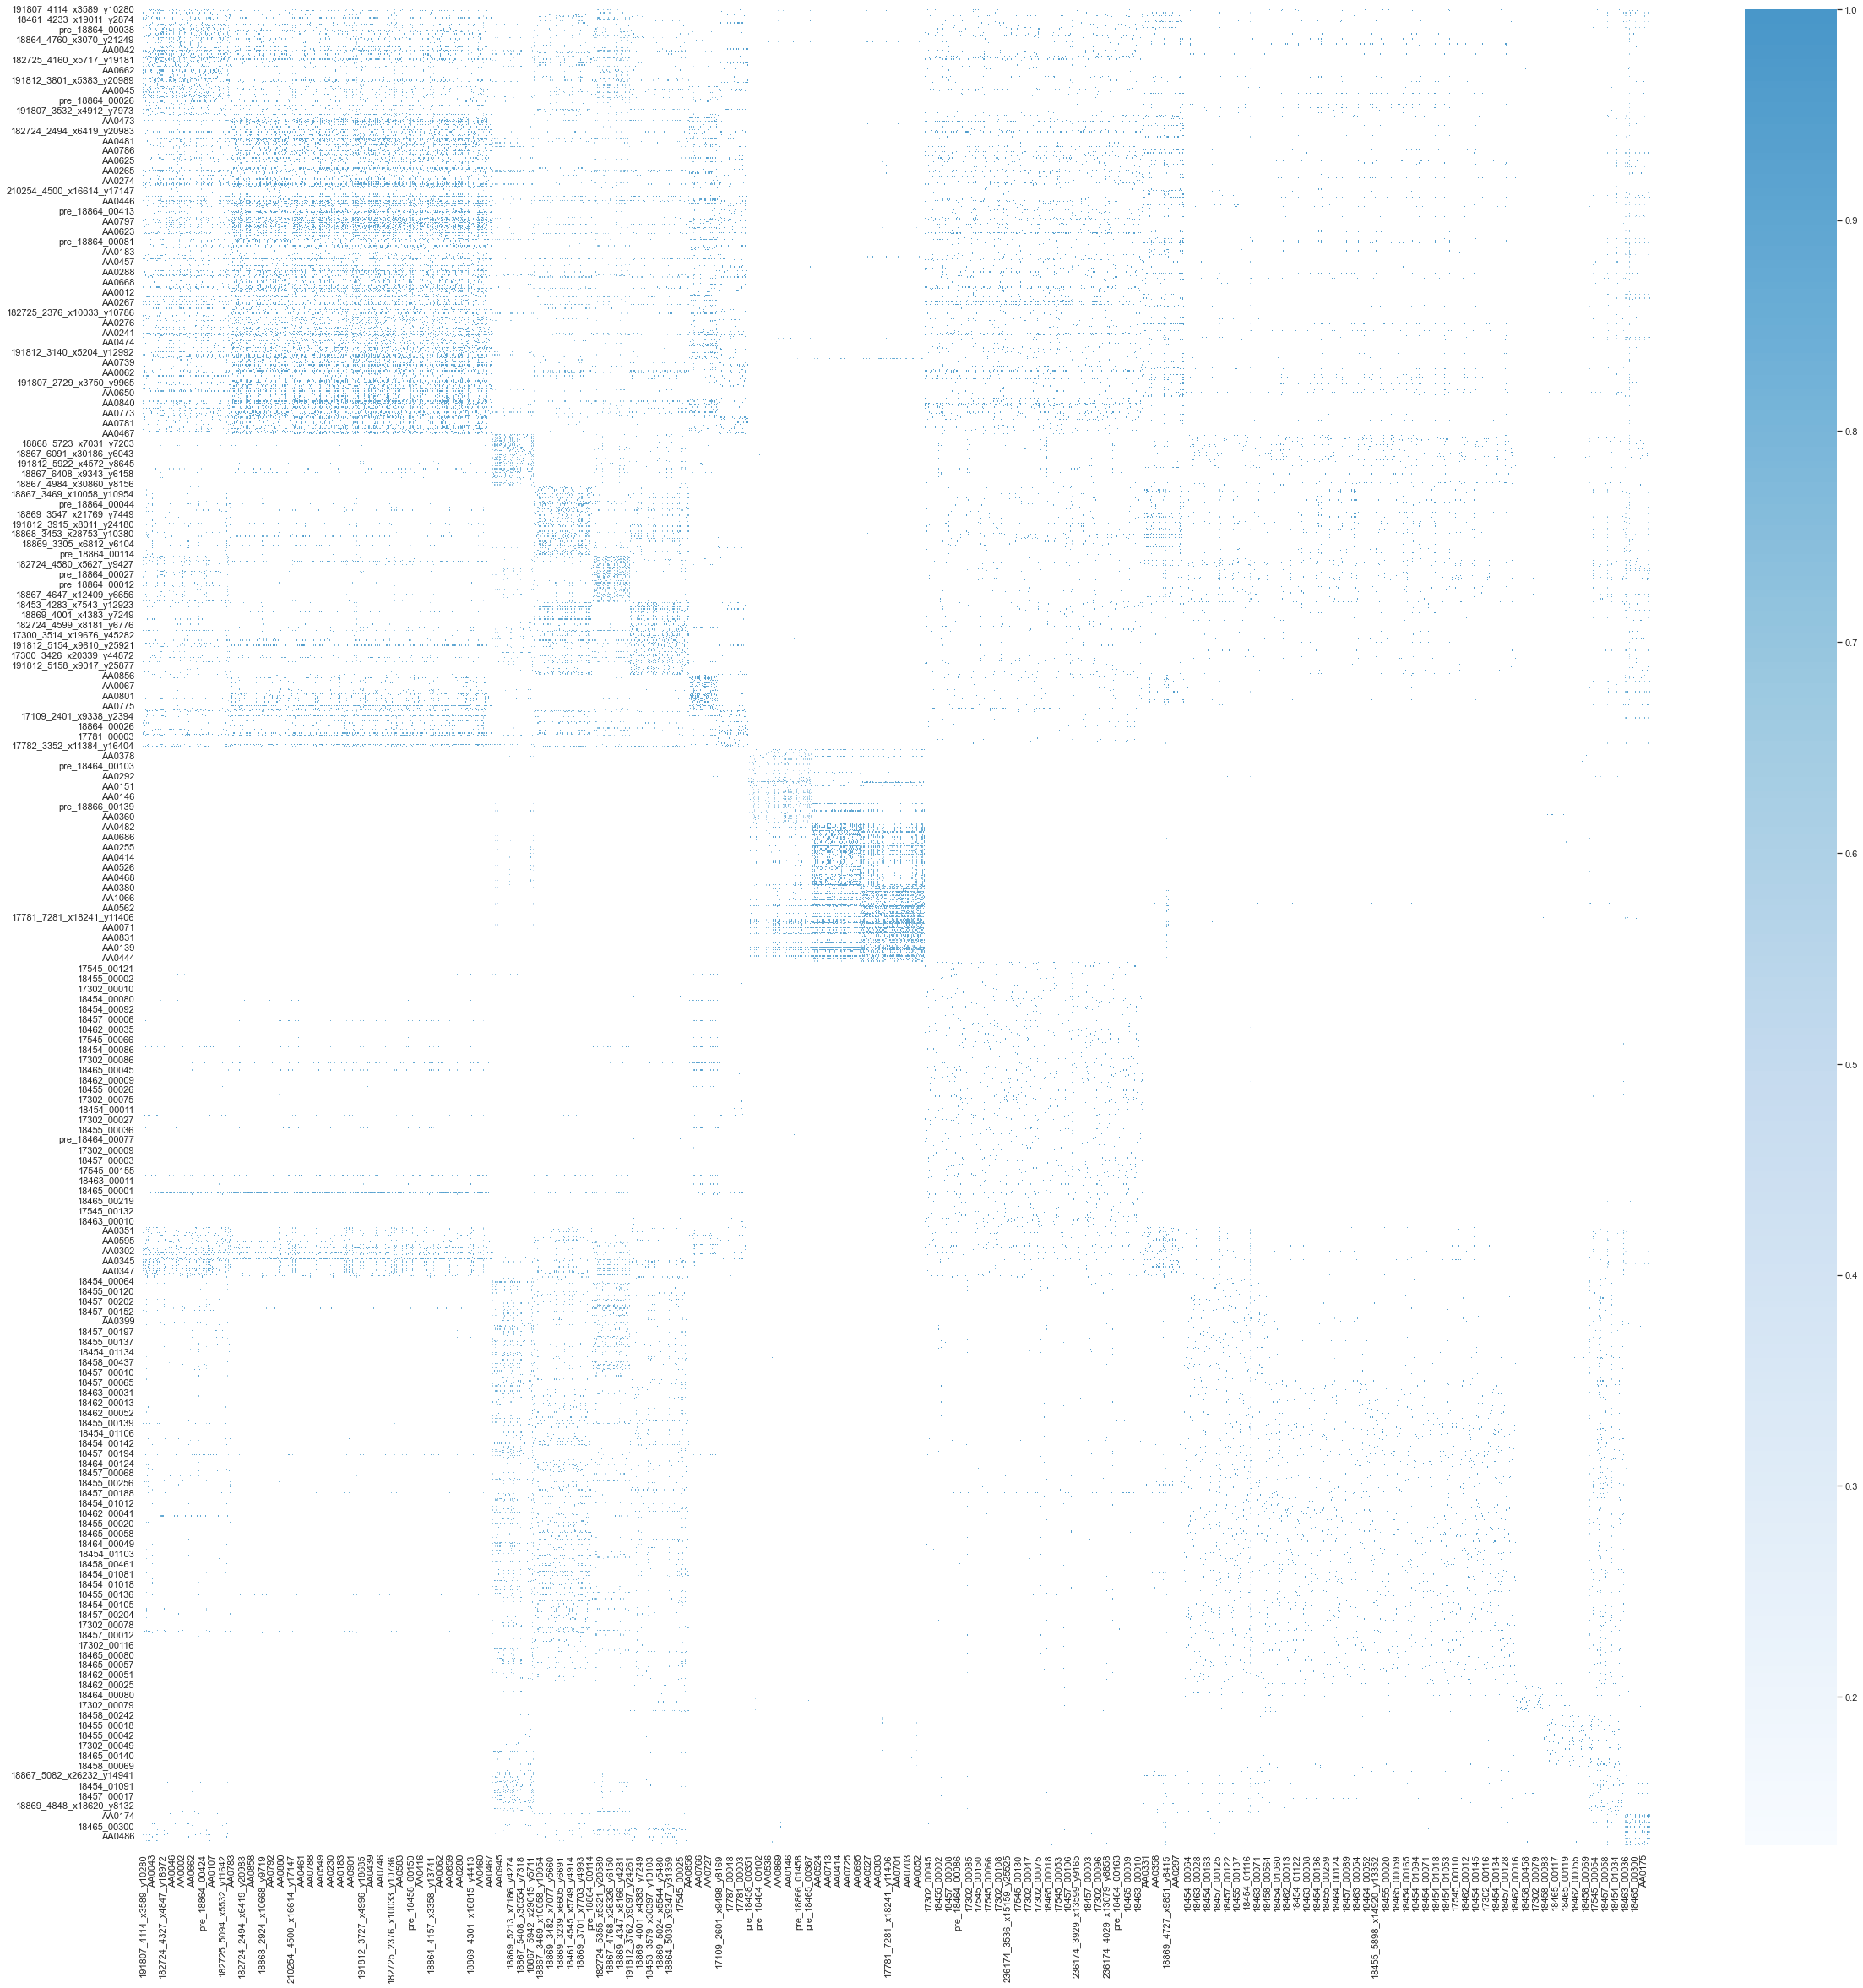

In [157]:
f, ax = plt.subplots(1,1, figsize=(40,40))
sns.heatmap(vis_data, ax=ax, 
            center=0.85,
            cmap ='Blues',
            mask=(vis_data<=0),
           )
# plt.savefig('./300_cell_connectivity.jpg', dpi=200, bbox_inches='tight')

In [158]:
# 'CTX': 'r', 'CNU': 'b', 'TH': 'g', 'HY': 'y', 'MB': 'c', 'HB': 'm'

In [159]:
vis_data

,191807_4114_x3589_y10280,AA0926,18457_00034,182725_4080_x6576_y11407,18868_3419_x27168_y8481,pre_18864_00069,18868_3112_x27714_y10534,AA0956,191812_3438_x6058_y10197,AA0617,...,AA0486,18462_00030,AA0175,17545_00085,18867_4789_x23709_y15765,18462_00062,AA0177,17545_00142,AA0330,AA0389
191807_4114_x3589_y10280,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.945906,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
AA0926,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.95098,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
18457_00034,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
182725_4080_x6576_y11407,0.894563,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.770231,0.0,0.604262,0.0,0.0,0.000000,0.718011,0.0,0.786876,0.0
18868_3419_x27168_y8481,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18462_00062,0.000000,0.0,0.0,0.000000,0.695953,0.0,0.857288,0.0,0.852318,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
AA0177,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.820279,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
17545_00142,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.953473,0.000000,0.0,0.000000,0.0
AA0330,0.000000,0.0,0.0,0.882456,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0


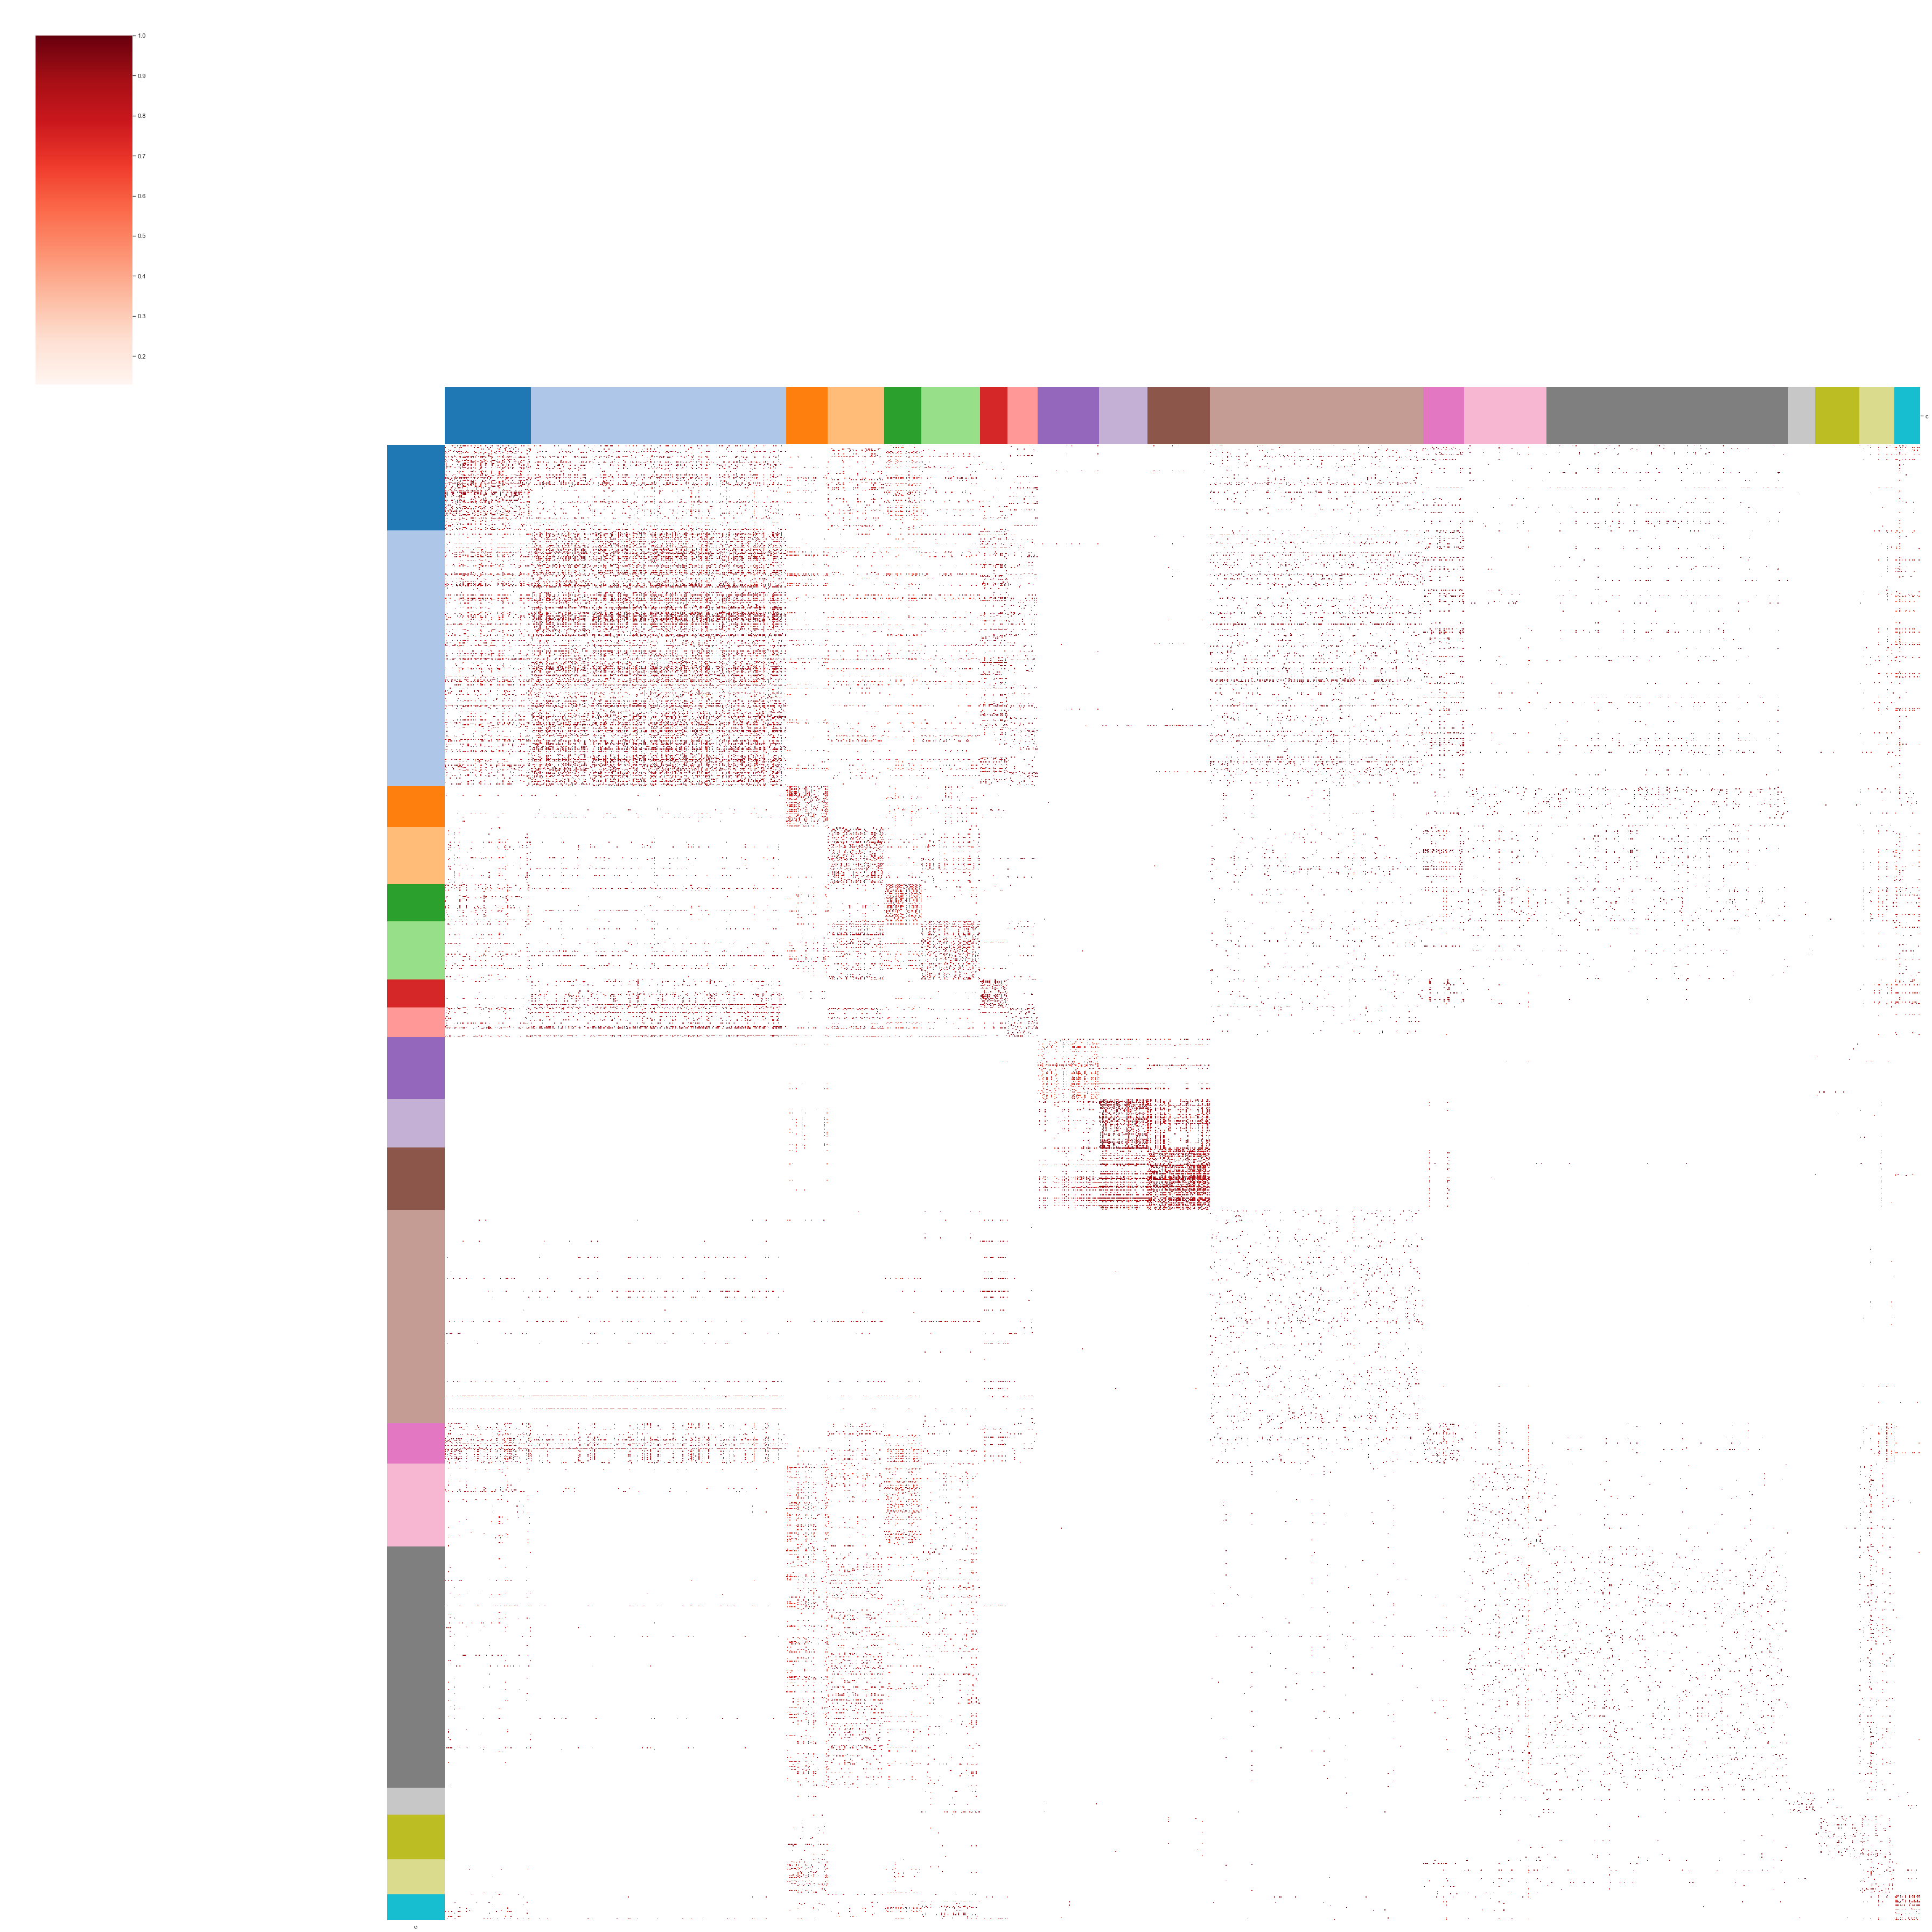

In [160]:
new_cmap=sns.color_palette("Reds", 1000)

g = sns.clustermap(vis_data, 
                   cmap=new_cmap,
                   mask=(vis_data<=0),
                   col_cluster=False, row_cluster=False, 
                    col_colors=label_df['c'],
                    row_colors=vis_label['c'], 
                    figsize=(50,50),
#                     center=0.85,
                    xticklabels = False,
                    yticklabels = False,
              )
# g.ax_heatmap.annotate(0,0,'hello',fontsize=50)
# (g.ax_row_colors.annotate('HB', (-300, 0), xycoords='axes points', fontsize=100, rotation=0))
# (g.ax_row_colors.annotate('MB', (-300, 100), xycoords='axes points', fontsize=100, rotation=0))
# (g.ax_row_colors.annotate('HY', (-300, 200), xycoords='axes points', fontsize=100, rotation=0))
# (g.ax_row_colors.annotate('TH', (-300, 1000), xycoords='axes points', fontsize=100, rotation=0))
# (g.ax_row_colors.annotate('CNU', (-300, 2200), xycoords='axes points', fontsize=100, rotation=0))
# (g.ax_row_colors.annotate('CTX', (-300, 4000), xycoords='axes points', fontsize=100, rotation=0))

# plt.savefig('./2k_'+ cur_type +'_cell_connectivity.jpg', dpi=200, bbox_inches='tight')